In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('D:\CSUN\COMP542\Dataset\phishing.csv')

In [62]:
data

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [63]:
data.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [190]:
#make a table of names of columns
data.columns


Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [64]:
data.drop(['Index'], axis=1, inplace=True)


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11054 non-null  int64
 1   LongURL              11054 non-null  int64
 2   ShortURL             11054 non-null  int64
 3   Symbol@              11054 non-null  int64
 4   Redirecting//        11054 non-null  int64
 5   PrefixSuffix-        11054 non-null  int64
 6   SubDomains           11054 non-null  int64
 7   HTTPS                11054 non-null  int64
 8   DomainRegLen         11054 non-null  int64
 9   Favicon              11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64
 16  InfoEmail            1

In [65]:
X = data.drop('class', axis=1)
y = data['class']


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


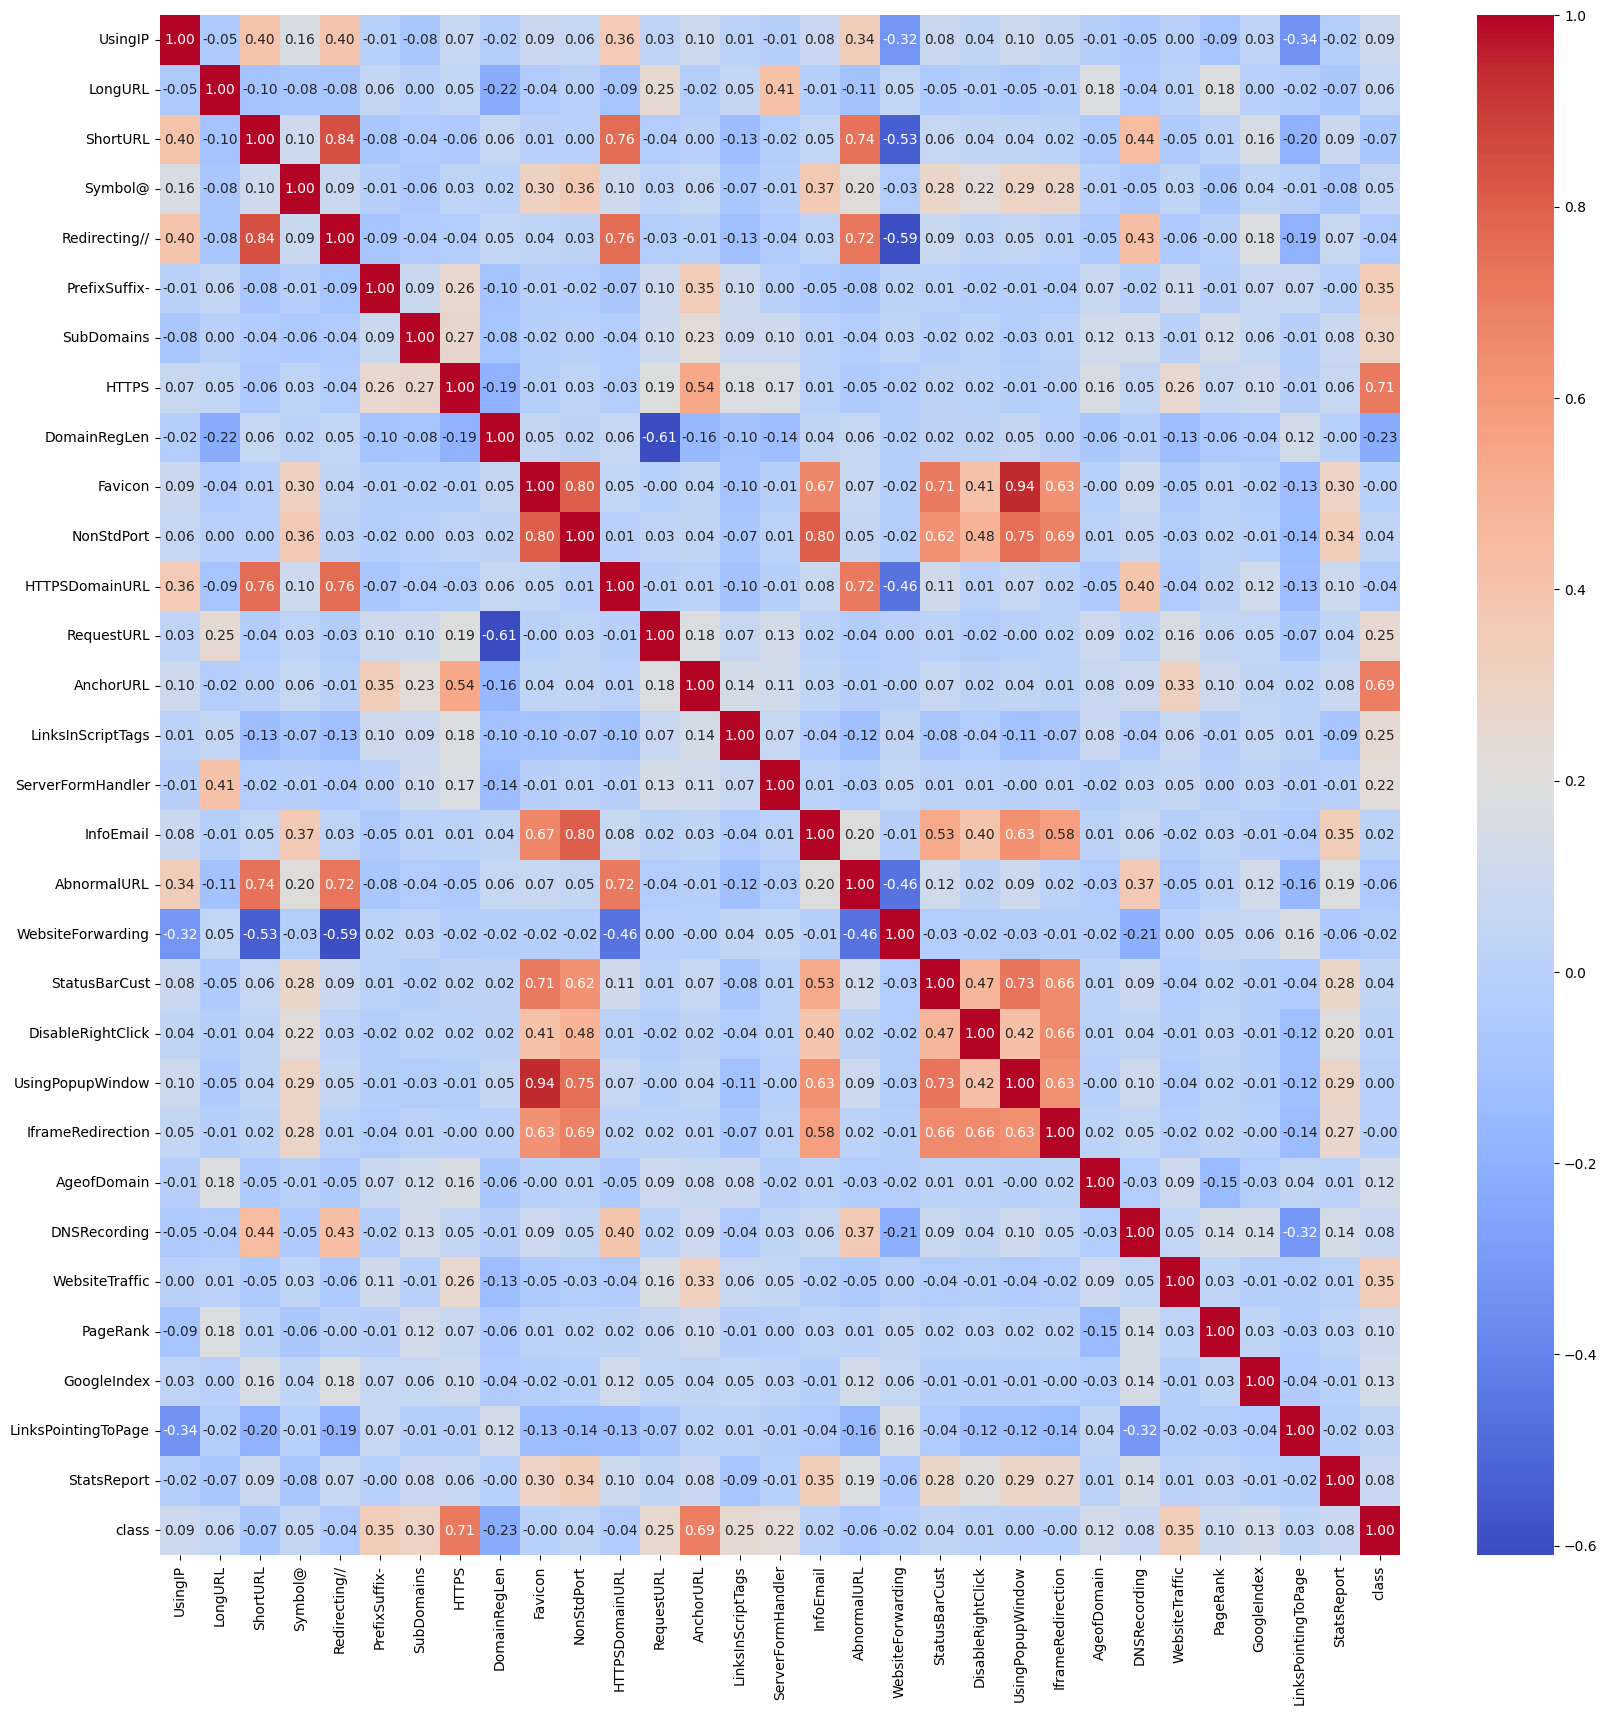

In [67]:
#show correlation
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


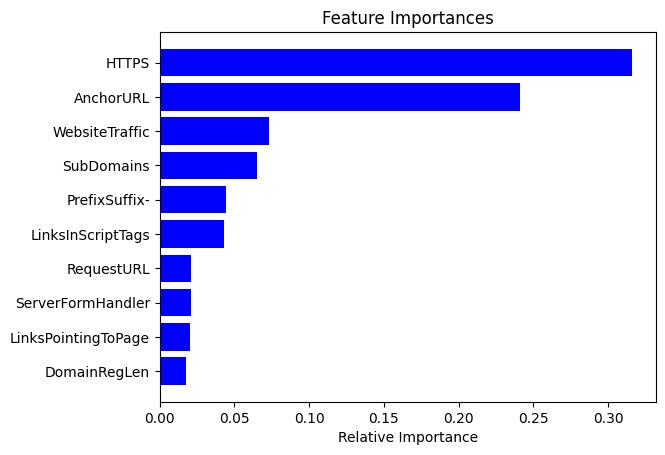

In [68]:
#show most important features
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [69]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('X_val shape:', X_val.shape)


X_train shape: (7074, 30)
X_test shape: (2211, 30)
X_val shape: (1769, 30)


In [70]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

In [71]:
print('Logistic Regression accuracy:', log_reg_accuracy)

Logistic Regression accuracy: 0.9326096788783356


In [72]:
log_reg_train_pred = log_reg.predict(X_train)
log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_pred)
print('Logistic Regression training accuracy:', log_reg_train_accuracy)

Logistic Regression training accuracy: 0.9281877297144473


In [73]:
log_reg_val_pred = log_reg.predict(X_val)
log_reg_val_accuracy = accuracy_score(y_val, log_reg_val_pred)
print('Logistic Regression validation accuracy:', log_reg_val_accuracy)

Logistic Regression validation accuracy: 0.9253815715093273


In [201]:
#print f1 score only
from sklearn.metrics import f1_score
f1_score(y_test, log_reg_pred)


0.9404238304678129

In [203]:
#print precision and recall only
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, log_reg_pred)


0.9289099526066351

In [204]:
recall_score(y_test, log_reg_pred)

0.9522267206477733

In [74]:
#show f1 score, precision, recall
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [75]:
#save the model
import pickle
filename = 'log_reg_model.sav'
pickle.dump(log_reg, open(filename, 'wb'))

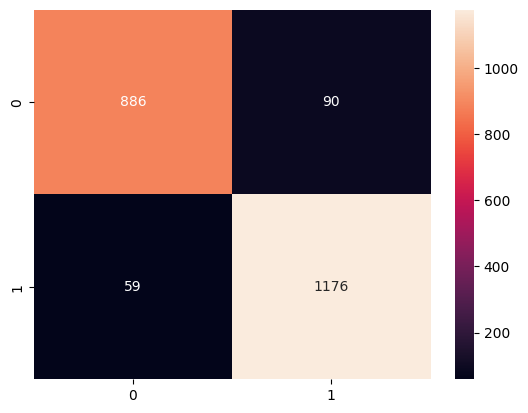

In [76]:
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
sns.heatmap(log_reg_cm, annot=True, fmt='d')
plt.show()


In [77]:
#train random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [78]:

print('Random Forest accuracy:', rf_accuracy)

Random Forest accuracy: 0.9687924016282226


In [79]:
rf_train_pred = rf.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
print('Random Forest training accuracy:', rf_train_accuracy)


Random Forest training accuracy: 0.991518235793045


In [80]:
rf_val_pred = rf.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, rf_val_pred)
print('Random Forest validation accuracy:', rf_val_accuracy)


Random Forest validation accuracy: 0.9739966082532504


In [205]:
#show f1 score only
f1_score(y_test, rf_pred)


0.9722110350382601

In [206]:
#show precision and recall only
precision_score(y_test, rf_pred)


0.9671474358974359

In [207]:
recall_score(y_test, rf_pred)

0.977327935222672

In [81]:
#show f1 score, precision, recall
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



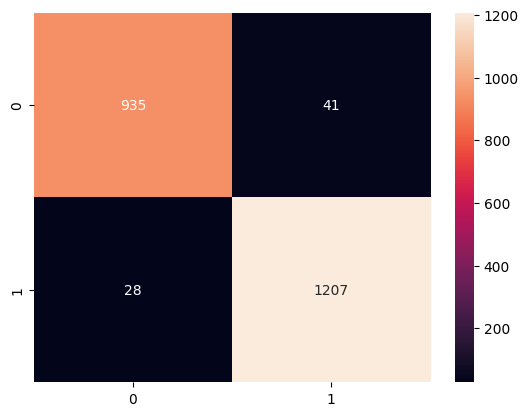

In [82]:
rf_cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cm, annot=True, fmt='d')
plt.show()


In [83]:
#save the model
filename = 'rf_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [84]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

print('SVM accuracy:', svm_accuracy)


SVM accuracy: 0.9488919041157847


In [85]:
svm_train_pred = svm.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_pred)
print('SVM training accuracy:', svm_train_accuracy)


SVM training accuracy: 0.9498162284421826


In [86]:
svm_val_pred = svm.predict(X_val)
svm_val_accuracy = accuracy_score(y_val, svm_val_pred)
print('SVM validation accuracy:', svm_val_accuracy)

SVM validation accuracy: 0.9491237987563595


In [208]:
#show f1 score only
f1_score(y_test, svm_pred)


0.9549980087614496

In [209]:
#show precision and recall only
precision_score(y_test, svm_pred)


0.9396551724137931

In [210]:
recall_score(y_test, svm_pred)

0.9708502024291498

In [87]:
#show f1 score, precision, recall
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

          -1       0.96      0.92      0.94       976
           1       0.94      0.97      0.95      1235

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



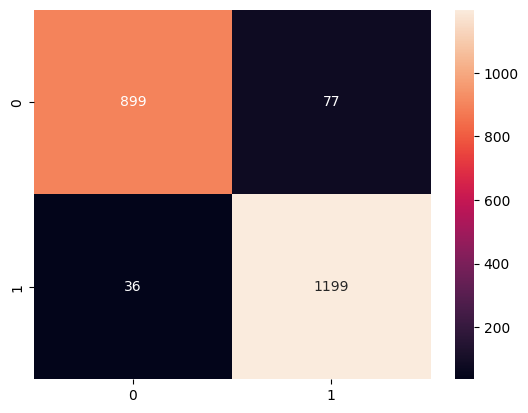

In [88]:
svm_cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(svm_cm, annot=True, fmt='d')
plt.show()


In [89]:
#save the model
filename = 'svm_model.sav'
pickle.dump(svm, open(filename, 'wb'))

In [90]:
#train knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)


In [91]:
print('KNN accuracy:', knn_accuracy)

KNN accuracy: 0.9357756671189507


In [92]:
knn_train_pred = knn.predict(X_train)
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
print('KNN training accuracy:', knn_train_accuracy)

KNN training accuracy: 0.9611252473847893


In [93]:
knn_val_pred = knn.predict(X_val)
knn_val_accuracy = accuracy_score(y_val, knn_val_pred)
print('KNN validation accuracy:', knn_val_accuracy)


KNN validation accuracy: 0.9400791407574901


In [211]:
#show f1 score only
f1_score(y_test, knn_pred)


0.9426030719482621

In [212]:
#show precision and recall only
precision_score(y_test, knn_pred)

0.9410815173527038

In [213]:

recall_score(y_test, knn_pred)

0.9441295546558705

In [94]:
#show f1 score, precision, recall
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

          -1       0.93      0.93      0.93       976
           1       0.94      0.94      0.94      1235

    accuracy                           0.94      2211
   macro avg       0.94      0.93      0.93      2211
weighted avg       0.94      0.94      0.94      2211



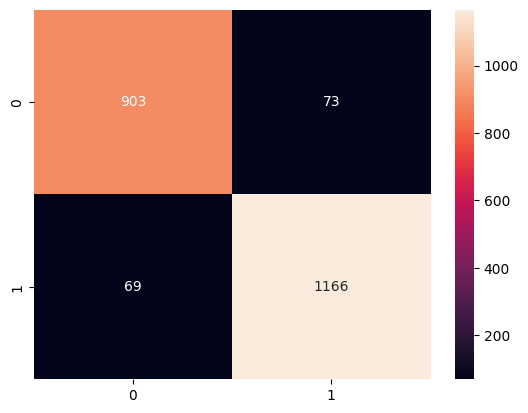

In [95]:
#confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(knn_cm, annot=True, fmt='d')
plt.show()


In [96]:
#save the model
filename = 'knn_model.sav'
pickle.dump(knn, open(filename, 'wb'))


In [97]:
#train using ANN
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()
ann.fit(X_train, y_train)
ann_pred = ann.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_pred)


c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [98]:
print('ANN accuracy:', ann_accuracy)

ANN accuracy: 0.9656264133876075


In [99]:
ann_train_pred = ann.predict(X_train)
ann_train_accuracy = accuracy_score(y_train, ann_train_pred)
print('ANN training accuracy:', ann_train_accuracy)


ANN training accuracy: 0.9877014418999152


In [100]:
ann_val_pred = ann.predict(X_val)
ann_val_accuracy = accuracy_score(y_val, ann_val_pred)
print('ANN validation accuracy:', ann_val_accuracy)


ANN validation accuracy: 0.9689089881288864


In [214]:
#show f1 score only
f1_score(y_test, ann_pred)


0.9695024077046549

In [215]:
#show precision and recall only
precision_score(y_test, ann_pred)


0.9610182975338106

In [216]:
recall_score(y_test, ann_pred)

0.9781376518218623

In [101]:
#show f1 score, precision, recall
print(classification_report(y_test, ann_pred))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.97      2211
weighted avg       0.97      0.97      0.97      2211



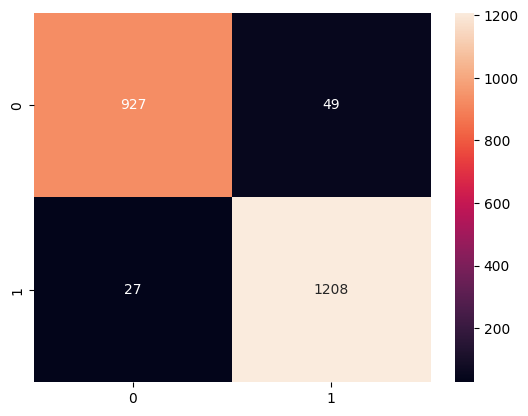

In [102]:
#confusion matrix
ann_cm = confusion_matrix(y_test, ann_pred)
sns.heatmap(ann_cm, annot=True, fmt='d')
plt.show()

In [103]:
#save the model
filename = 'ann_model.sav'
pickle.dump(ann, open(filename, 'wb'))

In [104]:
#train neural network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)

nn_pred = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)


c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [105]:
print('Neural Network accuracy:', nn_accuracy)

Neural Network accuracy: 0.9647218453188603


In [106]:
#show training accuracy
nn_train_pred = nn.predict(X_train)
nn_train_accuracy = accuracy_score(y_train, nn_train_pred)
print('Neural Network training accuracy:', nn_train_accuracy)


Neural Network training accuracy: 0.9860050890585241


In [107]:
#show validation accuracy
nn_val_pred = nn.predict(X_val)
nn_val_accuracy = accuracy_score(y_val, nn_val_pred)
print('Neural Network validation accuracy:', nn_val_accuracy)


Neural Network validation accuracy: 0.963256076879593


In [217]:
#show f1 score only
f1_score(y_test, nn_pred)


0.9685990338164251

In [218]:
#show precision and recall only
precision_score(y_test, nn_pred)


0.9631705364291433

In [219]:

recall_score(y_test, nn_pred)

0.974089068825911

In [108]:
#show f1 score, precision, recall
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       976
           1       0.96      0.97      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



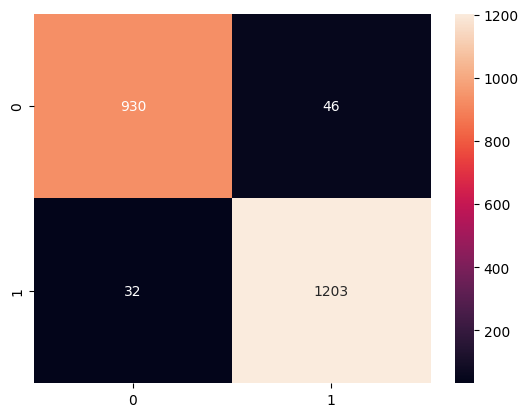

In [109]:
#confusion matrix
nn_cm = confusion_matrix(y_test, nn_pred)
sns.heatmap(nn_cm, annot=True, fmt='d')
plt.show()


In [110]:
#save the model
filename = 'nn_model.sav'
pickle.dump(nn, open(filename, 'wb'))

In [111]:
#train using decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)


In [112]:
print('Decision Tree accuracy:', dt_accuracy)


Decision Tree accuracy: 0.9547715965626413


In [113]:
#show training accuracy
dt_train_pred = dt.predict(X_train)
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
print('Decision Tree training accuracy:', dt_train_accuracy)


Decision Tree training accuracy: 0.991518235793045


In [114]:
#show validation accuracy
dt_val_pred = dt.predict(X_val)
dt_val_accuracy = accuracy_score(y_val, dt_val_pred)
print('Decision Tree validation accuracy:', dt_val_accuracy)


Decision Tree validation accuracy: 0.9643866591294517


In [220]:
#show f1 score only
f1_score(y_test, dt_pred)

0.9594813614262561

In [221]:

#show precision and recall only
precision_score(y_test, dt_pred)


0.9602595296025953

In [222]:

recall_score(y_test, dt_pred)

0.9587044534412955

In [115]:
#show f1 score, precision, recall
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



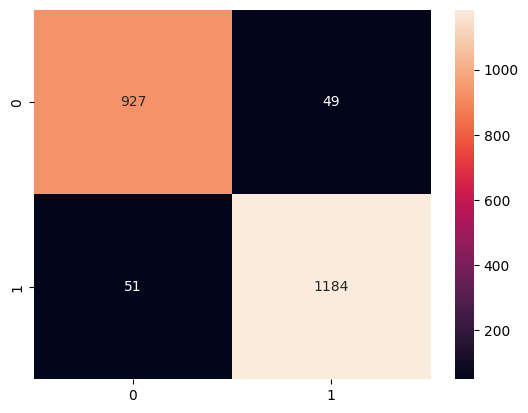

In [116]:
#confusion matrix
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True, fmt='d')
plt.show()


In [117]:
#save the model
filename = 'dt_model.sav'
pickle.dump(dt, open(filename, 'wb'))

In [118]:
#train using advanced random forest
adv_rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'bootstrap': [True, False],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, 60],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=adv_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best parameters:', best_params)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5400 fits failed out of a total of 16200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1905 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [119]:

print('Best parameters:', grid_search.best_params_)
print('Best estimator:', grid_search.best_estimator_)
print('Best score:', grid_search.best_score_)


Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=40, max_features='log2')
Best score: 0.970597208130707


In [120]:

adv_rf = grid_search.best_estimator_
adv_rf_pred = adv_rf.predict(X_test)
adv_rf_accuracy = accuracy_score(y_test, adv_rf_pred)



In [121]:

print('Advanced Random Forest accuracy:', adv_rf_accuracy)


Advanced Random Forest accuracy: 0.9701492537313433


In [122]:
#show training accuracy
adv_rf_train_pred = adv_rf.predict(X_train)
adv_rf_train_accuracy = accuracy_score(y_train, adv_rf_train_pred)
print('Advanced Random Forest training accuracy:', adv_rf_train_accuracy)


Advanced Random Forest training accuracy: 0.991518235793045


In [123]:
#show validation accuracy
adv_rf_val_pred = adv_rf.predict(X_val)
adv_rf_val_accuracy = accuracy_score(y_val, adv_rf_val_pred)
print('Advanced Random Forest validation accuracy:', adv_rf_val_accuracy)


Advanced Random Forest validation accuracy: 0.9756924816280385


In [223]:
#show f1 score only
f1_score(y_test, adv_rf_pred)


0.9734726688102894

In [224]:
#show precision and recall only
precision_score(y_test, adv_rf_pred)


0.9664804469273743

In [225]:

recall_score(y_test, adv_rf_pred)

0.9805668016194332

In [124]:
#show f1 score, precision, recall
print(classification_report(y_test, adv_rf_pred))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



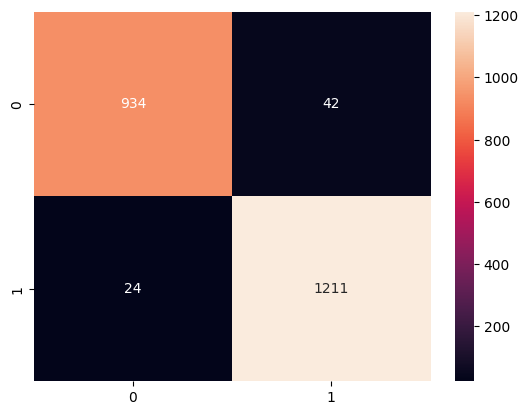

In [ ]:
#confusion matrix
adv_rf_cm = confusion_matrix(y_test, adv_rf_pred)
sns.heatmap(adv_rf_cm, annot=True, fmt='d')
plt.show()



In [126]:
#save the model
filename = 'advanced_rf_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [127]:
#build hybrid model
from sklearn.ensemble import VotingClassifier
classifiers = [('Logistic Regression', log_reg), ('Random Forest', rf), ('SVM', svm), ('KNN', knn), ('ANN', ann), ('Neural Network', nn), ('Decision Tree', dt)]
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
vc_pred = vc.predict(X_test)
vc_accuracy = accuracy_score(y_test, vc_pred)


c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [128]:
#show accuracy
print('Hybrid Model accuracy:', vc_accuracy)



Hybrid Model accuracy: 0.9674355495251018


In [129]:

#show training accuracy
vc_train_pred = vc.predict(X_train)
vc_train_accuracy = accuracy_score(y_train, vc_train_pred)
print('Hybrid Model training accuracy:', vc_train_accuracy)


Hybrid Model training accuracy: 0.9868532654792197


In [130]:
# show validation accuracy
vc_val_pred = vc.predict(X_val)
vc_val_accuracy = accuracy_score(y_val, vc_val_pred)
print('Hybrid Model validation accuracy:', vc_val_accuracy)


Hybrid Model validation accuracy: 0.971735443753533


In [131]:
#show f1 score, precision, recall
print(classification_report(y_test, vc_pred))


              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



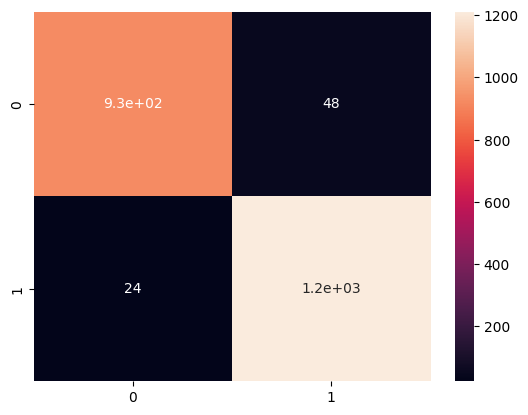

In [145]:
vc_cm = confusion_matrix(y_test, vc_pred)
sns.heatmap(vc_cm, annot=True)
plt.show()

In [133]:
#save the model
filename = 'hybrid_model.sav'
pickle.dump(vc, open(filename, 'wb'))


In [ ]:
#train catboost with grid search
cat = CatBoostClassifier()

param_grid = {
	'depth': [4, 7, 10],
	'learning_rate': [0.03, 0.1, 0.15],
	'l2_leaf_reg': [1, 4, 9],
	'iterations': [500]
}

grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.5584605	total: 2.25ms	remaining: 1.12s
1:	learn: 0.4502694	total: 9.52ms	remaining: 2.37s
2:	learn: 0.3793991	total: 25.7ms	remaining: 4.25s
3:	learn: 0.3315421	total: 40.3ms	remaining: 5s
4:	learn: 0.2852867	total: 45.5ms	remaining: 4.5s
5:	learn: 0.2534585	total: 53.1ms	remaining: 4.38s
6:	learn: 0.2325390	total: 66.1ms	remaining: 4.65s
7:	learn: 0.2140931	total: 79.5ms	remaining: 4.89s
8:	learn: 0.2021445	total: 92.6ms	remaining: 5.05s
9:	learn: 0.1906737	total: 106ms	remaining: 5.19s
10:	learn: 0.1825889	total: 119ms	remaining: 5.3s
11:	learn: 0.1744742	total: 132ms	remaining: 5.38s
12:	learn: 0.1668265	total: 146ms	remaining: 5.45s
13:	learn: 0.1591980	total: 158ms	remaining: 5.48s
14:	learn: 0.1531000	total: 170ms	remaining: 5.5s
15:	learn: 0.1481342	total: 183ms	remaining: 5.53s
16:	learn: 0.1434477	total: 197ms	remaining: 5.59s
17:	learn: 0.1395831	total: 210ms	remaining: 5.62s
18:	learn: 0.1357124	total:

In [173]:
print('Best parameters:', grid_search.best_params_)
print('Best estimator:', grid_search.best_estimator_)
print('Best score:', grid_search.best_score_)
cat = grid_search.best_estimator_
cat_pred = cat.predict(X_test)
cat_accuracy = accuracy_score(y_test, cat_pred)


Best parameters: {'depth': 10, 'iterations': 500, 'l2_leaf_reg': 9, 'learning_rate': 0.1}
Best estimator: <catboost.core.CatBoostClassifier object at 0x000002349FFF2800>
Best score: 0.9694664660812371


In [174]:

print('CatBoost accuracy:', cat_accuracy)

CatBoost accuracy: 0.9710538218000905


In [176]:
#show validation accuracy
cat_val_pred = cat.predict(X_val)
cat_val_accuracy = accuracy_score(y_val, cat_val_pred)
print('CatBoost validation accuracy:', cat_val_accuracy)


CatBoost validation accuracy: 0.9734313171283211


In [226]:
#show f1 score only
f1_score(y_test, cat_pred)


0.97429718875502

In [227]:
#show precision and recall only
precision_score(y_test, cat_pred)


0.9665338645418327

In [228]:

recall_score(y_test, cat_pred)

0.9821862348178138

In [177]:
#show f1 score, precision, recall
print(classification_report(y_test, cat_pred))


              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



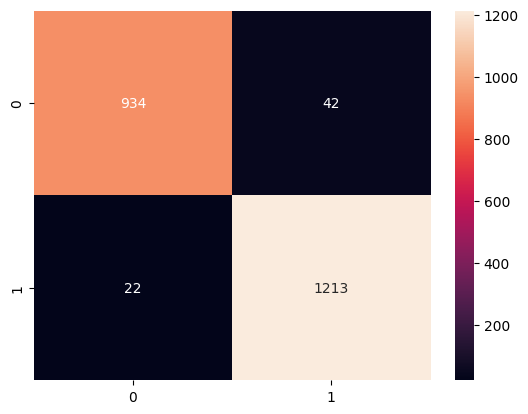

In [178]:
#confusion matrix
cat_cm = confusion_matrix(y_test, cat_pred)
sns.heatmap(cat_cm, annot=True, fmt='d')
plt.show()


In [185]:
#save the model
filename = 'cat_model.sav'
pickle.dump(cat, open(filename, 'wb'))


In [230]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN',  'Neural Network', 'Decision Tree', 'Advanced Random Forest', 'CatBoost']
training_accuracies = [log_reg_train_accuracy, rf_train_accuracy, svm_train_accuracy, knn_train_accuracy, nn_train_accuracy, dt_train_accuracy, adv_rf_train_accuracy, cat_train_accuracy]
validation_accuracies = [log_reg_val_accuracy, rf_val_accuracy, svm_val_accuracy, knn_val_accuracy, nn_val_accuracy, dt_val_accuracy, adv_rf_val_accuracy, cat_val_accuracy]
testing_accuracies = [log_reg_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, nn_accuracy, dt_accuracy, adv_rf_accuracy, cat_accuracy]
accuracies = pd.DataFrame({'Model': models, 'Training Accuracy': training_accuracies, 'Validation Accuracy': validation_accuracies, 'Testing Accuracy': testing_accuracies})
accuracies

,Model,Training Accuracy,Validation Accuracy,Testing Accuracy
0,Logistic Regression,0.928188,0.925382,0.932610
1,Random Forest,0.991518,0.973997,0.968792
2,SVM,0.949816,0.949124,0.948892
3,KNN,0.961125,0.940079,0.935776
4,Neural Network,0.986005,0.963256,0.964722
5,Decision Tree,0.991518,0.964387,0.954772
6,Advanced Random Forest,0.991518,0.975692,0.970149
7,CatBoost,0.991518,0.973431,0.971054


In [232]:
#print f1 score , precision and recall only
from sklearn.metrics import f1_score, precision_score, recall_score
f1_scores = []
precision_scores = []
recall_scores = []

for model in [log_reg, rf, svm, knn, nn, dt, adv_rf, cat]:
    model_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, model_pred))
    precision_scores.append(precision_score(y_test, model_pred))
    recall_scores.append(recall_score(y_test, model_pred))

accuracies1 = pd.DataFrame({'Model': models})
accuracies1['F1 Score'] = f1_scores
accuracies1['Precision'] = precision_scores
accuracies1['Recall'] = recall_scores
accuracies1


,Model,F1 Score,Precision,Recall
0,Logistic Regression,0.940424,0.928910,0.952227
1,Random Forest,0.972211,0.967147,0.977328
2,SVM,0.954998,0.939655,0.970850
3,KNN,0.942603,0.941082,0.944130
4,Neural Network,0.968599,0.963171,0.974089
5,Decision Tree,0.959481,0.960260,0.958704
6,Advanced Random Forest,0.973473,0.966480,0.980567
7,CatBoost,0.974297,0.966534,0.982186


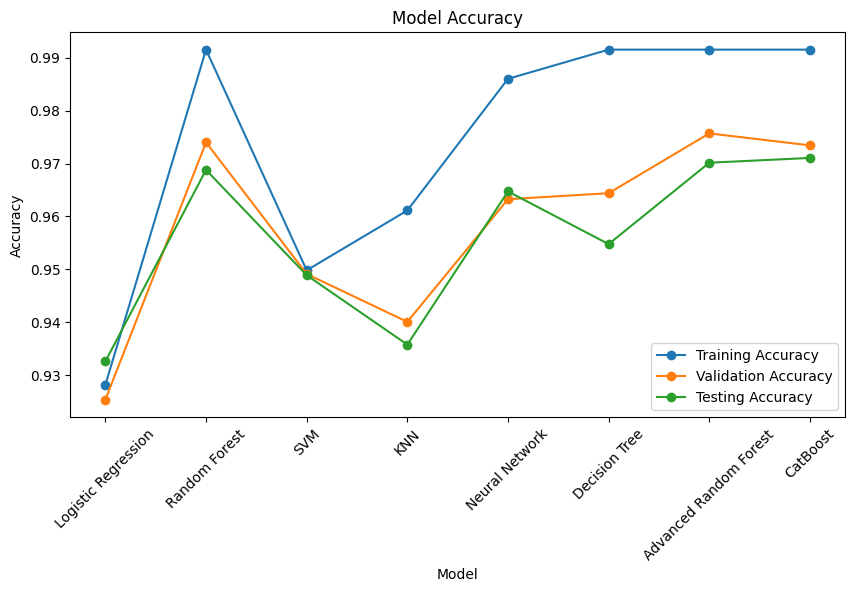

In [182]:
plt.figure(figsize=(10, 5))
plt.plot(models, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(models, validation_accuracies, label='Validation Accuracy', marker='o')
plt.plot(models, testing_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.show()


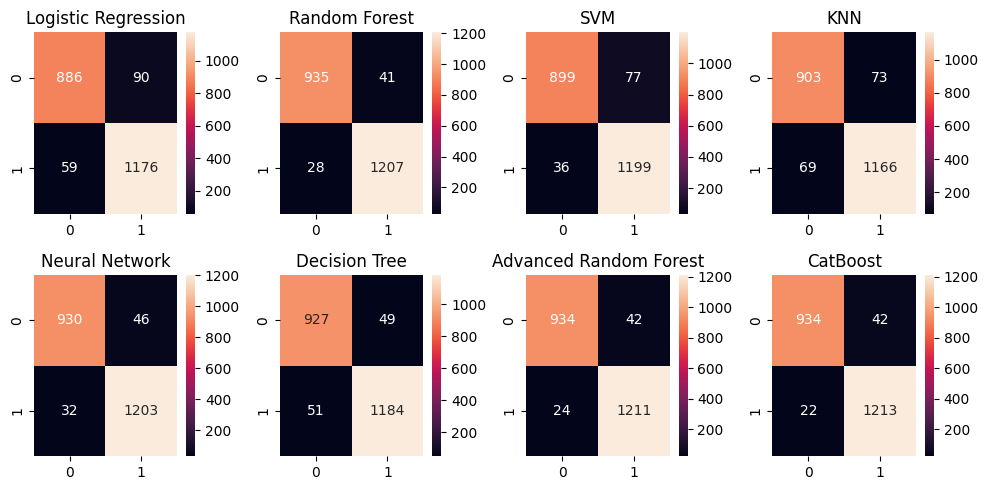

In [200]:
#combine all confusion matrices and make a graph small size and readable
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
axes = axes.ravel()
for i, model in enumerate([log_reg, rf, svm, knn, nn, dt, adv_rf, cat]):
    model_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, model_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(models[i])
plt.tight_layout()
plt.show()

